In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # type: ignore 
from scipy import stats
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.metrics import classification_report
import streamlit as st 


# Data Preprocessing + a bit of exploration

In [6]:
df = pd.read_csv("train.csv")

In [7]:
df.shape

(103904, 25)

so we have that many rows and 25 columns

In [8]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [9]:
df.tail()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied
103903,103903,62567,Male,Loyal Customer,27,Business travel,Business,1723,1,3,...,1,1,1,4,4,3,1,0,0.0,neutral or dissatisfied


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

arrival delay in minutes has 310 missing values. 
we have 4 objects we need to turn them into numerical values. (int64)
id is useless since we have that unnamed 0 column
we should remove the unnamed 0 column and the id column, now lets drop the first 2 columns


In [11]:
df1 = df.drop(df.iloc[:,[0, 1]], axis = 1)

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

lets provide a quick summary of central tendency, dispersion, and distribution shape.

In [13]:
df1.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


the mean of age is 39, there are outliers as we can see in the age,flight distance,departure and arrival delays.
lets check for null objects

In [14]:
df1.isna().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

so the same arrival delay in minutes have nulls, lets handle them first using mean.

In [15]:
mean_ArrDelay = df1["Arrival Delay in Minutes"].mean()
df1["Arrival Delay in Minutes"] = df1["Arrival Delay in Minutes"].fillna(mean_ArrDelay)

In [16]:
df1.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

so now we have no null values, lets handle outliers

we will use Z-Score to handle them

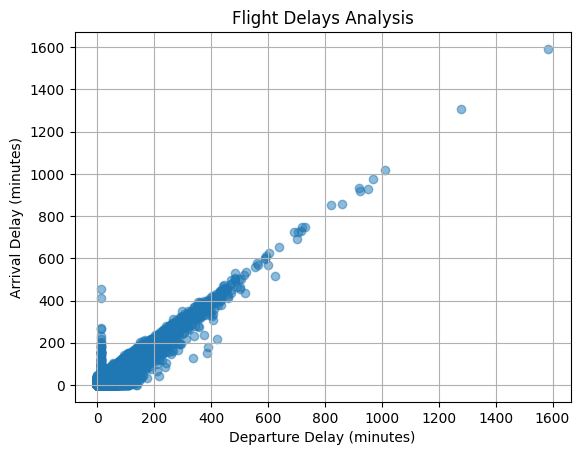

In [17]:
plt.scatter(df1['Arrival Delay in Minutes'], df1['Departure Delay in Minutes'], alpha = 0.5)
plt.title('Flight Delays Analysis')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Arrival Delay (minutes)')
plt.grid(True)  # Add gridlines
plt.show()

so we have outliers in arrival or departure delays

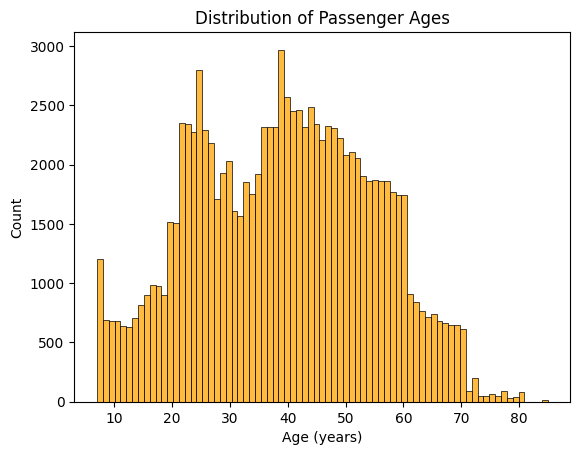

In [18]:
# Simple histogram for 'Age'
sns.histplot(data=df1, x="Age", color="orange", edgecolor="black", linewidth=0.5)

# Add titles/labels
plt.title("Distribution of Passenger Ages")
plt.xlabel("Age (years)")
plt.ylabel("Count")

plt.show()

we also need to remove the outliers in age

In [19]:
df1.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.640909
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


lastly we have flight distance

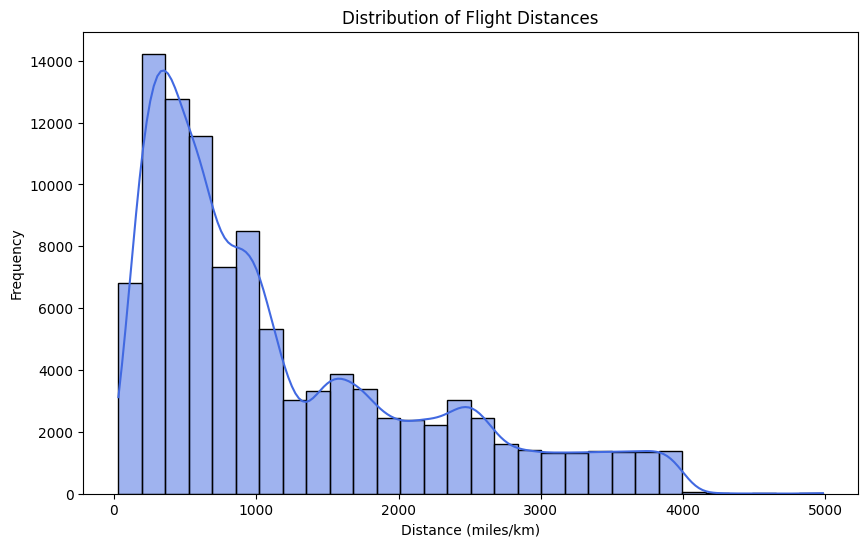

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df1, x="Flight Distance", bins=30, kde=True, color='royalblue')
plt.title('Distribution of Flight Distances')
plt.xlabel('Distance (miles/km)')
plt.ylabel('Frequency')
plt.show()

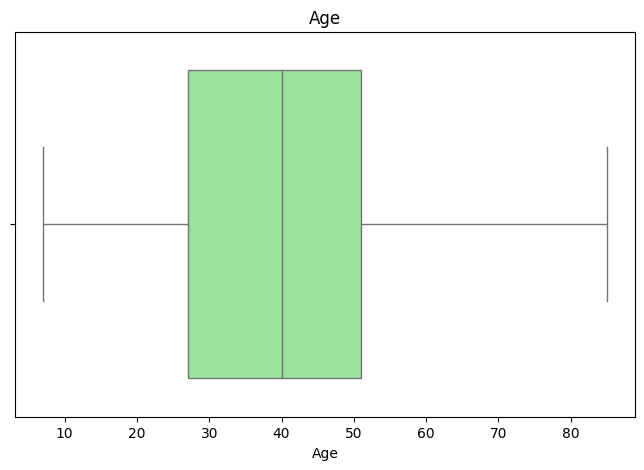

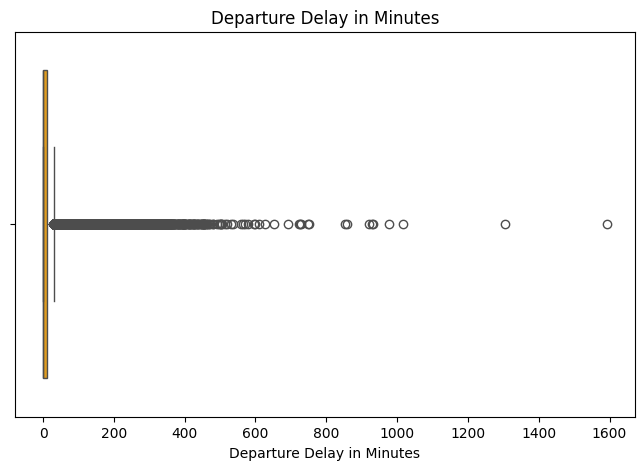

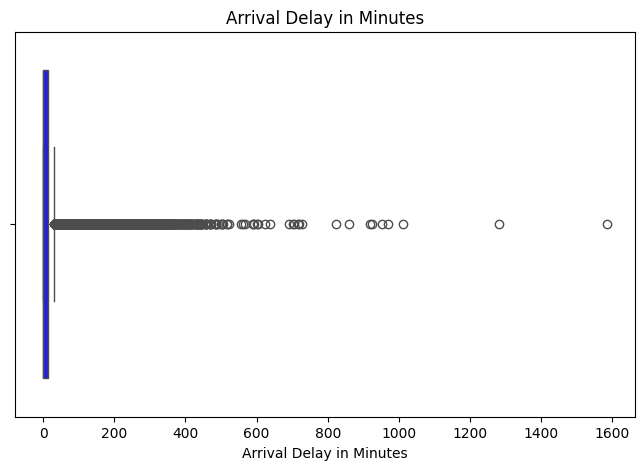

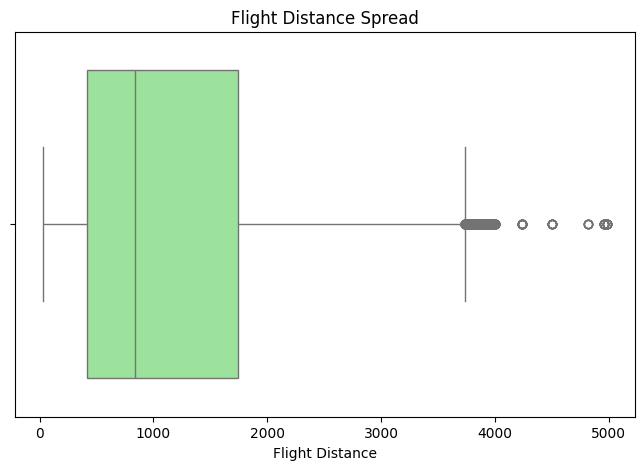

In [21]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df1, x="Age", color='lightgreen')
plt.title('Age')
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(data=df1, x="Departure Delay in Minutes", color='orange')
plt.title('Departure Delay in Minutes')
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(data=df1, x="Arrival Delay in Minutes", color='blue')
plt.title('Arrival Delay in Minutes')
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(data=df1, x="Flight Distance", color='lightgreen')
plt.title('Flight Distance Spread')
plt.show()

i dont think we should just remove the outliers in the delays like that since they should affect satisfaction, lets visualize them first


In [22]:
# Filter for extreme delays
extreme_delays = df1[
    (df1['Arrival Delay in Minutes'] > 180) | 
    (df1['Departure Delay in Minutes'] > 180)
]

# Count satisfaction levels, also we did the *100 to turn it into percentage
satisfaction_counts = extreme_delays['satisfaction'].value_counts(normalize=True) * 100

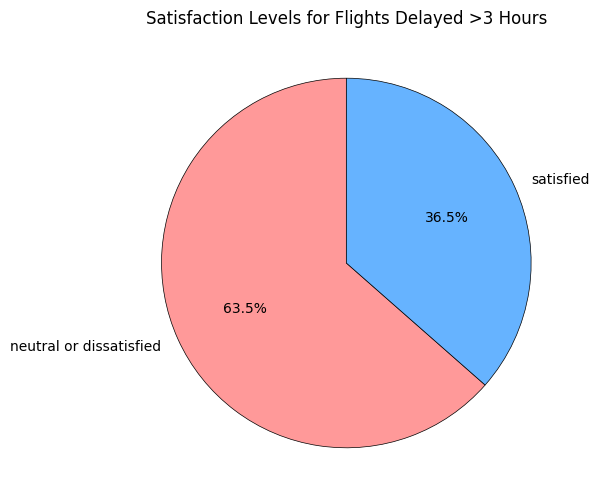

In [23]:
plt.figure(figsize=(8, 6))
satisfaction_counts.plot.pie(
    autopct='%1.1f%%',
    colors=['#ff9999','#66b3ff'],
    startangle=90,
    wedgeprops={'edgecolor': 'black', 'linewidth': 0.5}
)
plt.title('Satisfaction Levels for Flights Delayed >3 Hours')
plt.ylabel('')  # Hide default 'Satisfaction' label
plt.show()

C:\Users\Laptop\AppData\Local\Temp\ipykernel_1776\1387525346.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extreme_delays['Delay Range'] = pd.cut(


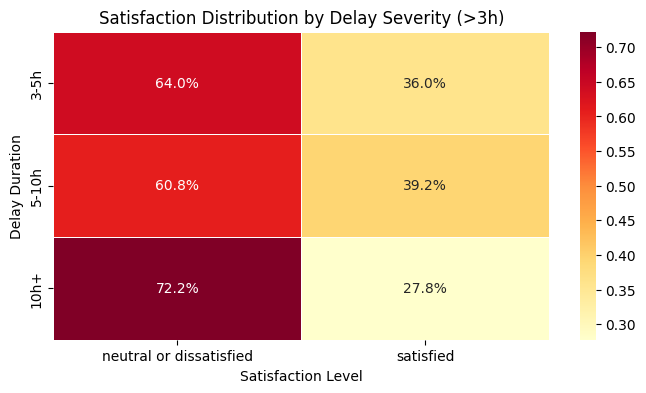

In [24]:
# Create delay bins (e.g., 180-300, 300-600, 600+ mins)
extreme_delays['Delay Range'] = pd.cut(
    extreme_delays['Arrival Delay in Minutes'],
    bins=[180, 300, 600, np.inf],
    labels=['3-5h', '5-10h', '10h+']
)

# Heatmap
satisfaction_heatmap = pd.crosstab(
    extreme_delays['Delay Range'],
    extreme_delays['satisfaction'],
    normalize='index'
)

plt.figure(figsize=(8, 4))
sns.heatmap(
    satisfaction_heatmap, 
    annot=True, 
    fmt='.1%',
    cmap='YlOrRd',
    linewidths=0.5
)
plt.title('Satisfaction Distribution by Delay Severity (>3h)')
plt.xlabel('Satisfaction Level')
plt.ylabel('Delay Duration')
plt.show()

In [25]:
from scipy.stats import chi2_contingency

# Chi-square test for independence, we searched google for this because we arent sure
contingency_table = pd.crosstab(
    extreme_delays['Arrival Delay in Minutes'] > 180,
    extreme_delays['satisfaction']
)
chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"Chi-square p-value: {p:.4f}")
print("Significant difference in satisfaction?" , "Yes" if p < 0.05 else "No")

Chi-square p-value: 0.9712
Significant difference in satisfaction? No


i dont think we should remove them right away like that, maybe we can make them into labels and from ranges
from
0 to 15//
15 to 30//
30 to 60//
60 to 120//
120 to 180//
180 to 240//
240 to 300//
300 to 600//
600+

In [26]:
delay_bins = [0, 15, 30, 60, 120, 180, 240, 300, 600, float('inf')]
tier_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8]  

In [27]:
df1['Departure Delay in Minutes'] = pd.cut(
    df1['Departure Delay in Minutes'],
    bins=delay_bins,
    labels=tier_labels,
    right=False  
).astype(int)  

In [28]:
df1['Arrival Delay in Minutes'] = pd.cut(
    df1['Arrival Delay in Minutes'],
    bins=delay_bins,
    labels=tier_labels,
    right=False
).astype(int)

In [29]:
print(df1[['Departure Delay in Minutes', 'Arrival Delay in Minutes']].sample(5))
# now we verify

       Departure Delay in Minutes  Arrival Delay in Minutes
13598                           0                         0
48816                           0                         0
9005                            0                         0
67625                           0                         0
966                             0                         1


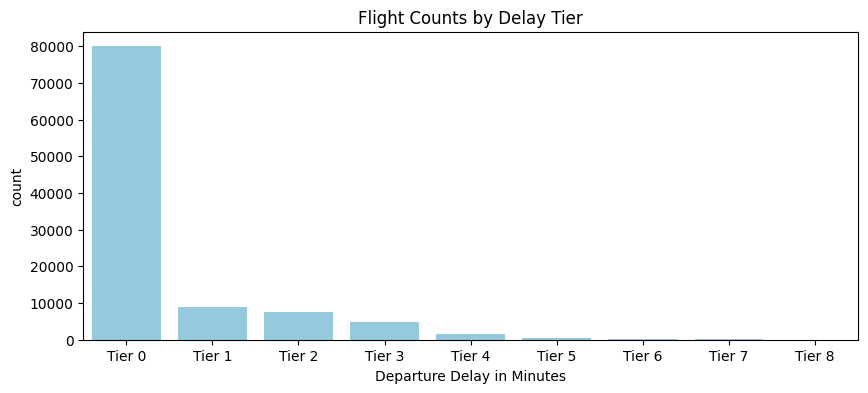

In [30]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df1, x='Departure Delay in Minutes', color='skyblue')
plt.xticks(ticks=range(9), labels=[f'Tier {i}' for i in range(9)])
plt.title('Flight Counts by Delay Tier')
plt.show()

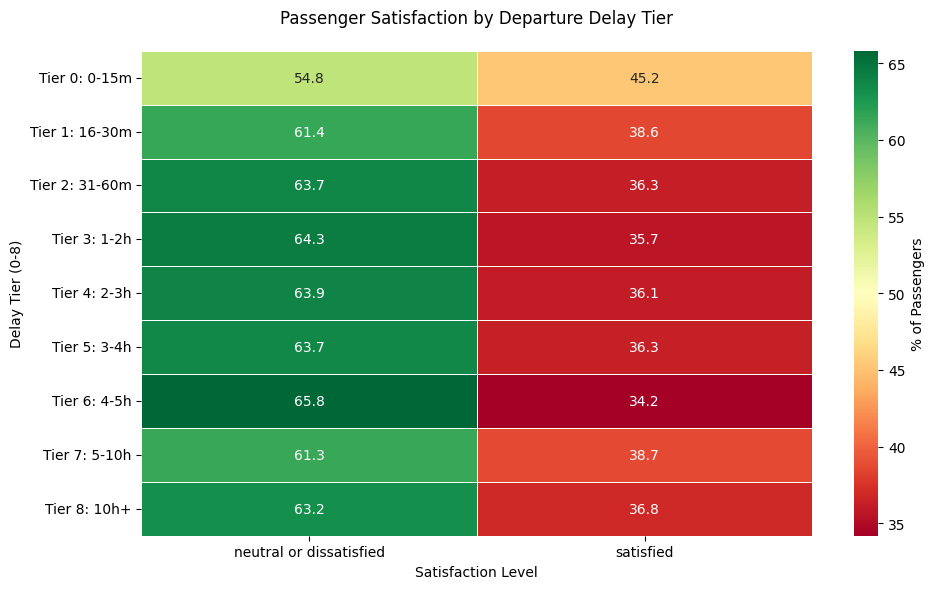

In [31]:
heatmap_data = pd.crosstab(
    df1['Departure Delay in Minutes'],  
    df1['satisfaction'],
    normalize='index'  
) * 100  # Express as percentages

plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt='.1f',  
    cmap='RdYlGn',  
    linewidths=0.5,
    cbar_kws={'label': '% of Passengers'}
)


plt.title('Passenger Satisfaction by Departure Delay Tier', pad=20)
plt.xlabel('Satisfaction Level')
plt.ylabel('Delay Tier (0-8)')


tier_definitions = [
    '0-15m', '16-30m', '31-60m', '1-2h', 
    '2-3h', '3-4h', '4-5h', '5-10h', '10h+'
]
plt.yticks( #7eta keda 34an tozbot el places
    ticks=np.arange(9) + 0.5,  # Center labels
    labels=[f'Tier {i}: {tier_definitions[i]}' for i in range(9)],
    rotation=0
)

plt.tight_layout()
plt.show()

now lets handle the flight distance outliers

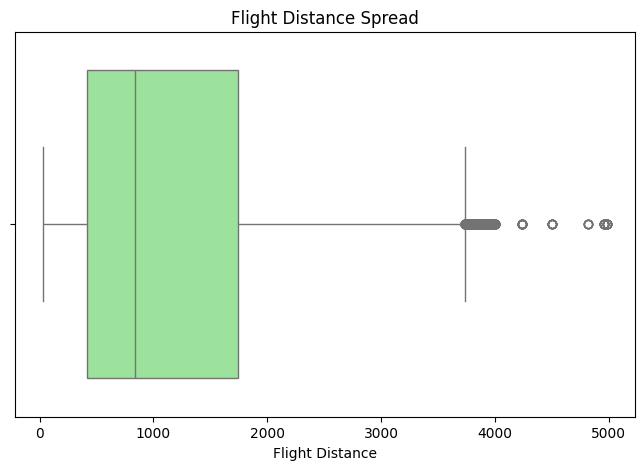

In [32]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df1, x="Flight Distance", color='lightgreen')
plt.title('Flight Distance Spread')
plt.show()

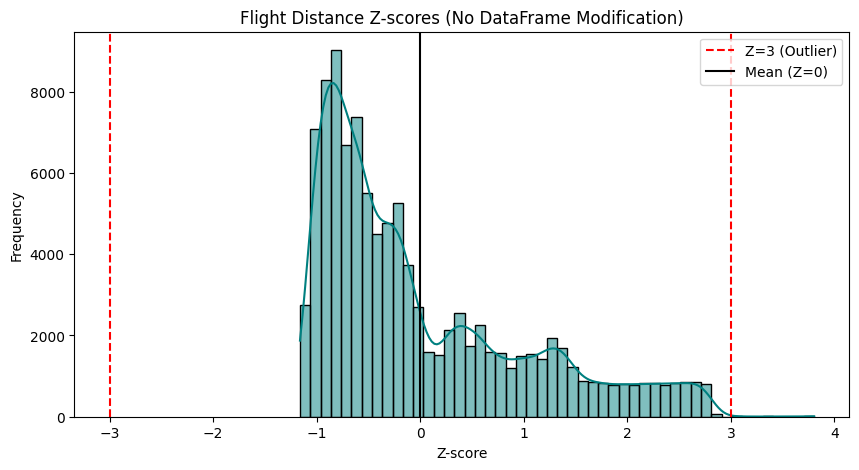

In [33]:
flight_z = stats.zscore(df1['Flight Distance'])
plt.figure(figsize=(10, 5))
sns.histplot(flight_z, bins=50, kde=True, color='teal')


plt.axvline(x=3, color='red', linestyle='--', label='Z=3 (Outlier)')
plt.axvline(x=-3, color='red', linestyle='--')
plt.axvline(x=0, color='black', linestyle='-', label='Mean (Z=0)')

plt.title('Flight Distance Z-scores (No DataFrame Modification)')
plt.xlabel('Z-score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

as we see the outliers here need to be handled.

In [34]:
FlightQ1 = df1['Flight Distance'].quantile(0.25)
FlightQ3 = df1['Flight Distance'].quantile(0.75)
FlightIQR = FlightQ3 - FlightQ1

# Define outlier thresholds (1.5x IQR is standard)
Flightlower_bound = max(0,FlightQ1 - 1.5 * FlightIQR) # we cant have 0 values.
Flightupper_bound = FlightQ3 + 1.5 * FlightIQR

print(f"IQR Range: [{FlightQ1:.0f}, {FlightQ3:.0f}]")
print(f"Lower Bound: {Flightlower_bound:.0f} | Upper Bound: {Flightupper_bound:.0f}")

IQR Range: [414, 1743]
Lower Bound: 0 | Upper Bound: 3736


In [35]:
# Cap Flight Distance at upper_bound
df1['Flight Distance'] = df1['Flight Distance'].clip(upper=Flightupper_bound)

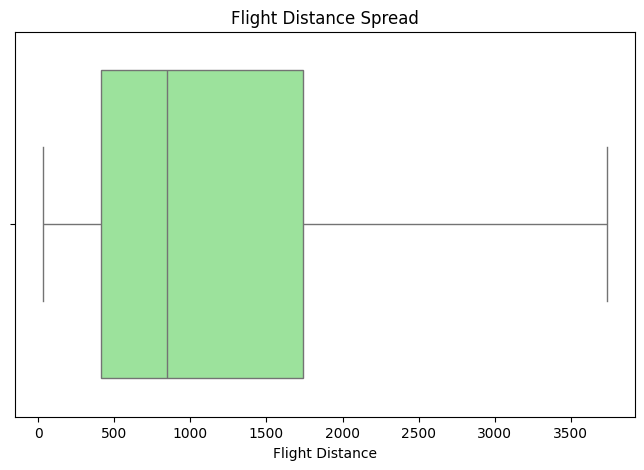

In [36]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df1, x="Flight Distance", color='lightgreen')
plt.title('Flight Distance Spread')
plt.show()

no have no outliers in flight distance now, only the age remains.

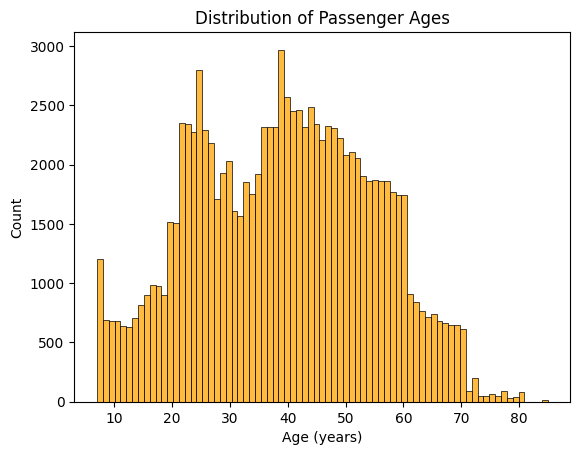

In [37]:
sns.histplot(data=df1, x="Age", color="orange", edgecolor="black", linewidth=0.5)

plt.title("Distribution of Passenger Ages")
plt.xlabel("Age (years)")
plt.ylabel("Count")

plt.show()

In [38]:
df1['Age_Zscore'] = np.abs(stats.zscore(df1['Age']))

df1 = df1[df1['Age_Zscore'] <= 3]

df1 = df1.drop(columns=['Age_Zscore'])

In [39]:
print("Age Statistics After Outlier Removal:")
print(df1['Age'].describe())

Age Statistics After Outlier Removal:
count    103887.000000
mean         39.372241
std          15.104929
min           7.000000
25%          27.000000
50%          40.000000
75%          51.000000
max          80.000000
Name: Age, dtype: float64


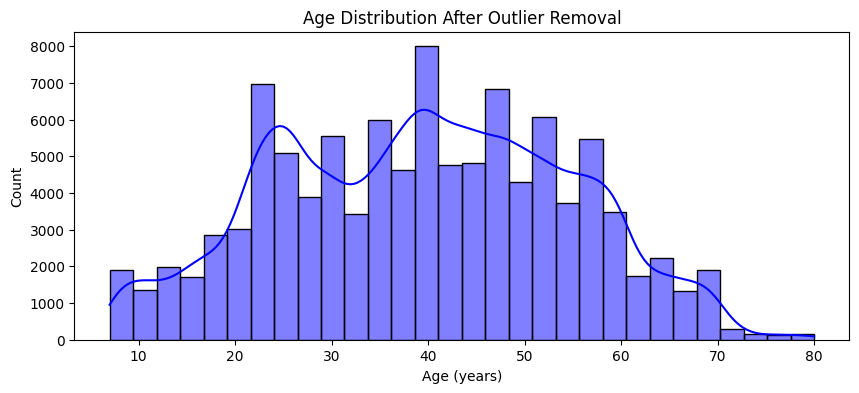

In [40]:
plt.figure(figsize=(10, 4))
sns.histplot(df1['Age'], bins=30, kde=True, color='blue')
plt.title('Age Distribution After Outlier Removal')
plt.xlabel('Age (years)')
plt.ylabel('Count')
plt.show()

In [41]:
df1.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460.0,3,4,3,1,...,5,4,3,4,4,5,5,1,1,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235.0,3,2,3,3,...,1,1,5,3,1,4,1,0,0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142.0,2,2,2,2,...,5,4,3,4,4,4,5,0,0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562.0,2,5,5,5,...,2,2,5,3,1,4,2,0,0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214.0,3,3,3,3,...,3,3,4,4,3,3,3,0,0,satisfied


In [42]:
df1.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103887.000000,103887.000000,103887.000000,103887.000000,103887.000000,103887.000000,103887.000000,103887.000000,103887.000000,103887.000000,103887.000000,103887.000000,103887.000000,103887.000000,103887.000000,103887.000000,103887.000000,103887.000000
mean,39.372241,1186.141283,2.729706,3.060325,2.756813,2.976840,3.202162,3.250397,3.439401,3.358216,3.382493,3.351064,3.631898,3.304273,3.640667,3.286330,0.487886,0.499995
std,15.104929,988.113707,1.327893,1.525098,1.398925,1.277619,1.329574,1.349555,1.319122,1.333034,1.288285,1.315655,1.180911,1.265422,1.175518,1.312305,1.064179,1.071935
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,0.000000,0.000000
max,80.000000,3736.500000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,8.000000,8.000000


In [43]:
# now we remove duplicates 
df1.duplicated().sum()

np.int64(2)

In [44]:
df2 = df1.drop_duplicates().reset_index(drop=True)

print(f"\nOriginal df1 shape: {df1.shape}")
print(f"New df2 shape: {df2.shape}")
print(f"Duplicates in df2: {np.int64(df2.duplicated().sum())}")


Original df1 shape: (103887, 23)
New df2 shape: (103885, 23)
Duplicates in df2: 0


now we handled the nulls, outliers, duplicates. now we must turn categorical into numerical then
feature engineering and data exploration

In [45]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103885 entries, 0 to 103884
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103885 non-null  object 
 1   Customer Type                      103885 non-null  object 
 2   Age                                103885 non-null  int64  
 3   Type of Travel                     103885 non-null  object 
 4   Class                              103885 non-null  object 
 5   Flight Distance                    103885 non-null  float64
 6   Inflight wifi service              103885 non-null  int64  
 7   Departure/Arrival time convenient  103885 non-null  int64  
 8   Ease of Online booking             103885 non-null  int64  
 9   Gate location                      103885 non-null  int64  
 10  Food and drink                     103885 non-null  int64  
 11  Online boarding                    1038

before i turn categorical to numerical i want to explore the data and relationships to understand it better then turn them.

# Data Exploration

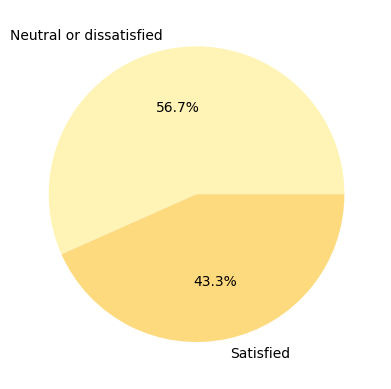

In [46]:
plt.pie(df2.satisfaction.value_counts(), labels = ["Neutral or dissatisfied", "Satisfied"], colors = sns.color_palette("YlOrBr"), autopct = '%1.1f%%')
pass

now correlation matrix

In [47]:
# 1. Calculate correlations (numeric columns only)
corr_mat = df2.select_dtypes(include=['number']).corr()

# 2. Format the output
print("Correlation Matrix:\n")
print(corr_mat.to_string(float_format="%.6f"))  # 6 decimal places

Correlation Matrix:

                                        Age  Flight Distance  Inflight wifi service  Departure/Arrival time convenient  Ease of Online booking  Gate location  Food and drink  Online boarding  Seat comfort  Inflight entertainment  On-board service  Leg room service  Baggage handling  Checkin service  Inflight service  Cleanliness  Departure Delay in Minutes  Arrival Delay in Minutes
Age                                1.000000         0.099678               0.017945                           0.038235                0.024691      -0.001408        0.023079         0.209146      0.160402                0.076618          0.057929          0.040615         -0.047424         0.035455         -0.048881     0.053602                   -0.008653                 -0.011138
Flight Distance                    0.099678         1.000000               0.007227                          -0.019956                0.066044       0.004753        0.057230         0.215494      0.157885     

there is a really high correlation between delay in arrival and departure, so we will remove one of them, the criteria for our removal is that arrival delay most of the time is caused by departure delay so we will remove arrival delay

In [48]:
df3 = df2.drop(columns=['Arrival Delay in Minutes'])  

# Verify  
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103885 entries, 0 to 103884
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103885 non-null  object 
 1   Customer Type                      103885 non-null  object 
 2   Age                                103885 non-null  int64  
 3   Type of Travel                     103885 non-null  object 
 4   Class                              103885 non-null  object 
 5   Flight Distance                    103885 non-null  float64
 6   Inflight wifi service              103885 non-null  int64  
 7   Departure/Arrival time convenient  103885 non-null  int64  
 8   Ease of Online booking             103885 non-null  int64  
 9   Gate location                      103885 non-null  int64  
 10  Food and drink                     103885 non-null  int64  
 11  Online boarding                    1038

In [49]:
# 1. Calculate correlations (numeric columns only)
corr_mat = df3.select_dtypes(include=['number']).corr()

# 2. Format the output
print("Correlation Matrix:\n")
print(corr_mat.to_string(float_format="%.6f"))  # 6 decimal places

Correlation Matrix:

                                        Age  Flight Distance  Inflight wifi service  Departure/Arrival time convenient  Ease of Online booking  Gate location  Food and drink  Online boarding  Seat comfort  Inflight entertainment  On-board service  Leg room service  Baggage handling  Checkin service  Inflight service  Cleanliness  Departure Delay in Minutes
Age                                1.000000         0.099678               0.017945                           0.038235                0.024691      -0.001408        0.023079         0.209146      0.160402                0.076618          0.057929          0.040615         -0.047424         0.035455         -0.048881     0.053602                   -0.008653
Flight Distance                    0.099678         1.000000               0.007227                          -0.019956                0.066044       0.004753        0.057230         0.215494      0.157885                0.129026          0.109913          0.134

now we see no more too high correlations so we continue

In [50]:
categorical_indexes = [0, 1, 3, 4,6,7,8,9,10,11,12,13,14,15,16,17,18,19] # + list(range(6, 20))

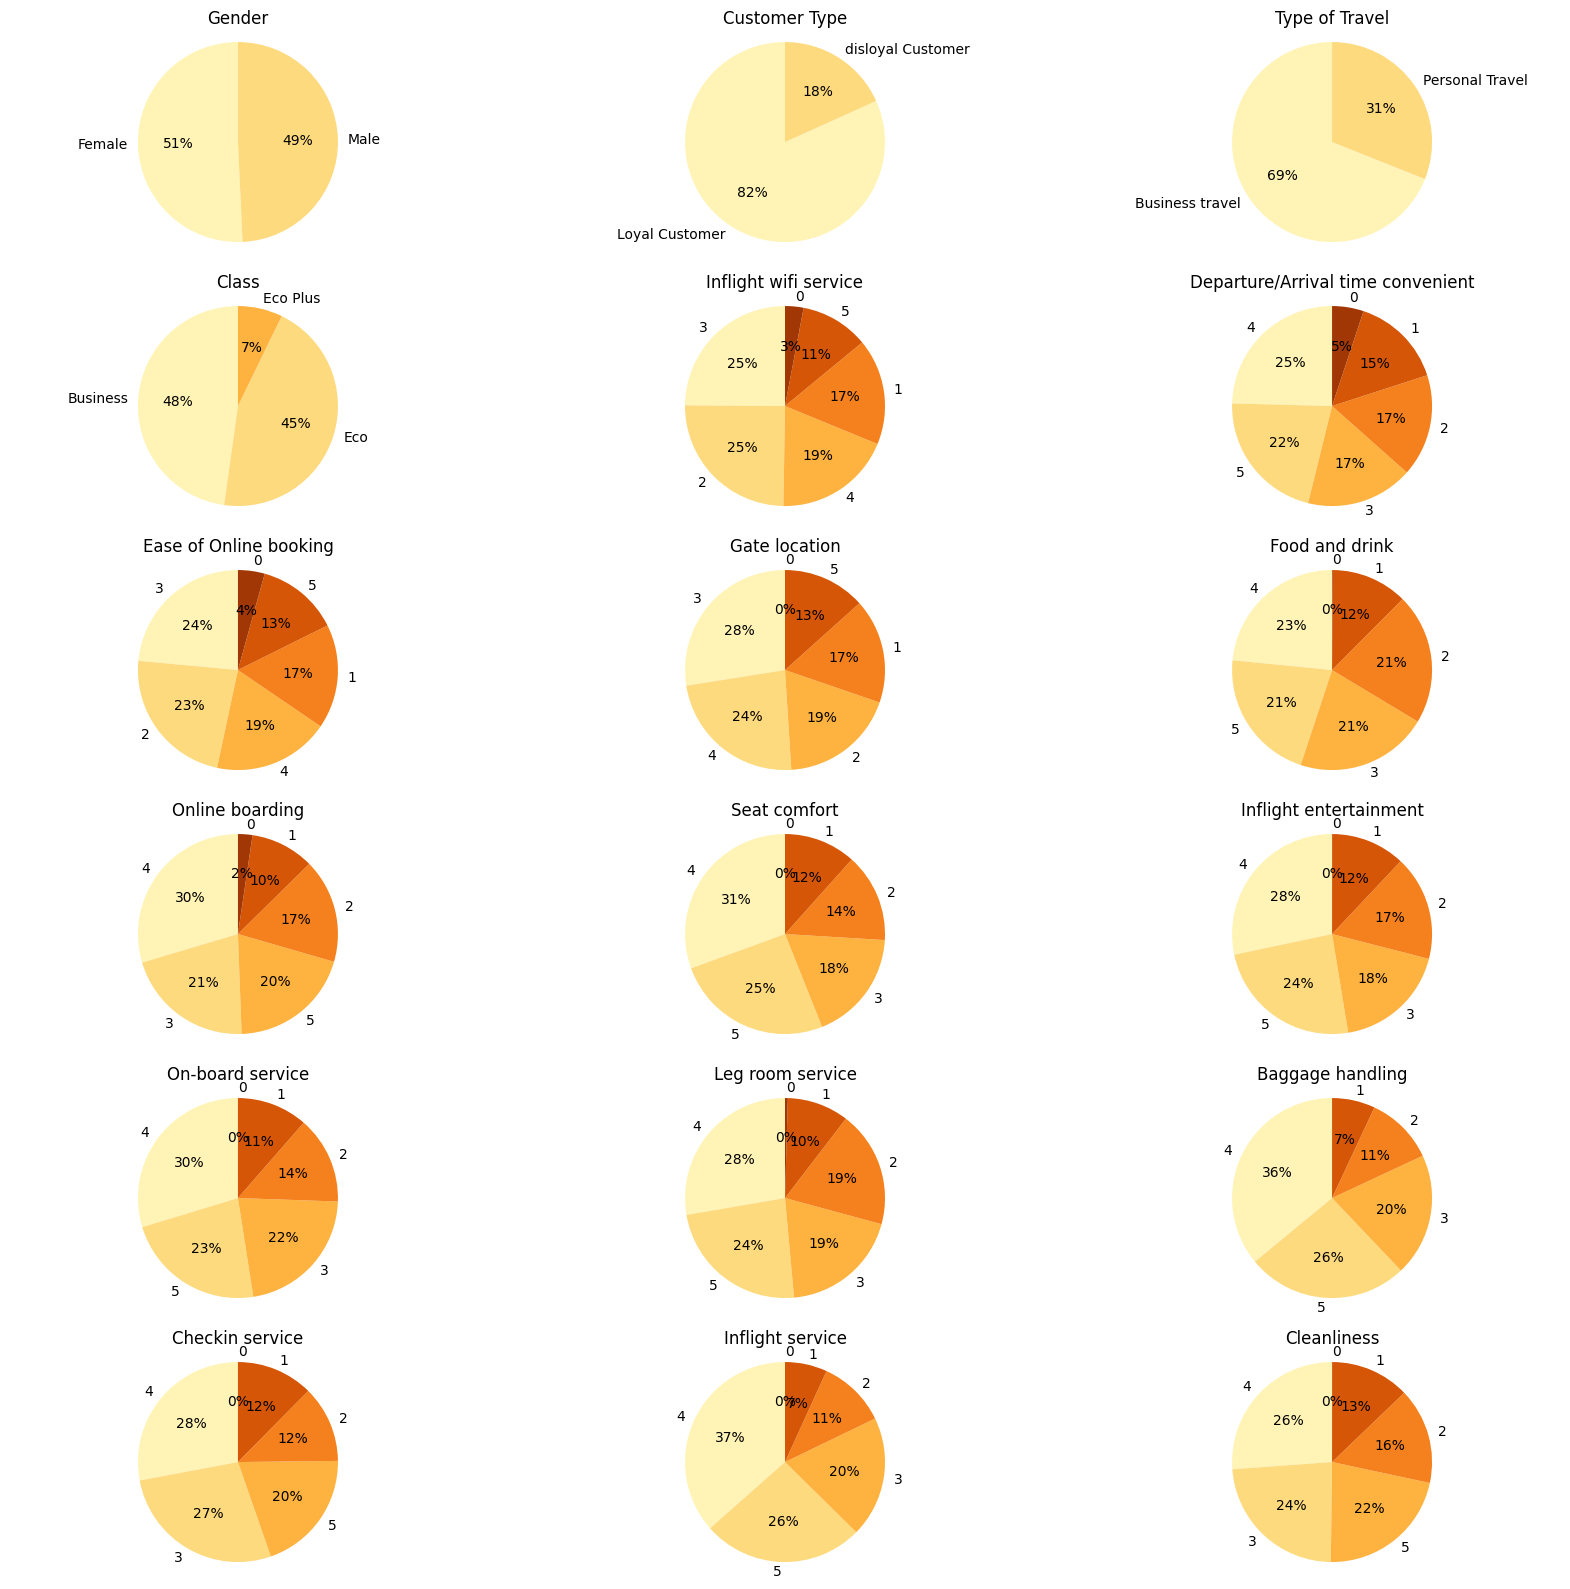

In [51]:
categ = df3.iloc[:,categorical_indexes]
fig, axes = plt.subplots(6, 3, figsize = (20, 20))
for i, col in enumerate(categ):
    column_values = df3[col].value_counts()
    labels = column_values.index
    sizes = column_values.values
    axes[i//3, i%3].pie(sizes, labels = labels, colors = sns.color_palette("YlOrBr"), autopct = '%1.0f%%', startangle = 90)
    axes[i//3, i%3].axis('equal')
    axes[i//3, i%3].set_title(col)
plt.show()

Now we compared all of them lets analyze.

from what i can see 
1. males and females are about the same
2. more than most (82%) are loyal customers who travelled for business (69%)
3. about 50% were business class


In [52]:
# it appears we have to convert the categorical values to "category" type and we forgot so lets do it now since we need it
df3.iloc[:,categorical_indexes] = df3.iloc[:,categorical_indexes].astype('category')
pass

C:\Users\Laptop\AppData\Local\Temp\ipykernel_1776\3386943720.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0         3
1         3
2         2
3         2
4         3
         ..
103880    2
103881    4
103882    1
103883    1
103884    1
Name: Inflight wifi service, Length: 103885, dtype: category
Categories (6, int64): [0, 1, 2, 3, 4, 5]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df3.iloc[:,categorical_indexes] = df3.iloc[:,categorical_indexes].astype('category')
C:\Users\Laptop\AppData\Local\Temp\ipykernel_1776\3386943720.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0         4
1         2
2         2
3         5
4         3
         ..
103880    1
103881    4
103882    1
103883    1
103884    3
Name: Departure/Arrival time convenient, Length: 103885, dtype: category
Categories (6, 

In [53]:
# i want to check if the gender plays a role
gender_satisfaction = pd.crosstab(
    index=df3['Gender'],
    columns=df3['satisfaction'],
    margins=True,  # Show totals
    normalize='index'  # Convert to percentages per gender
)
print(gender_satisfaction * 100)  # Show as percentages

satisfaction  neutral or dissatisfied  satisfied
Gender                                          
Female                      57.257759  42.742241
Male                        56.051516  43.948484
All                         56.663618  43.336382


In [54]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103885 entries, 0 to 103884
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender                             103885 non-null  object  
 1   Customer Type                      103885 non-null  object  
 2   Age                                103885 non-null  int64   
 3   Type of Travel                     103885 non-null  object  
 4   Class                              103885 non-null  object  
 5   Flight Distance                    103885 non-null  float64 
 6   Inflight wifi service              103885 non-null  category
 7   Departure/Arrival time convenient  103885 non-null  category
 8   Ease of Online booking             103885 non-null  category
 9   Gate location                      103885 non-null  category
 10  Food and drink                     103885 non-null  category
 11  Online boarding           

In [55]:
categorical_cols = df3.columns[[0, 1, 3, 4] + list(range(6, 20))]  # Get actual column names
df3[categorical_cols] = df3[categorical_cols].astype('category')

In [56]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103885 entries, 0 to 103884
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender                             103885 non-null  category
 1   Customer Type                      103885 non-null  category
 2   Age                                103885 non-null  int64   
 3   Type of Travel                     103885 non-null  category
 4   Class                              103885 non-null  category
 5   Flight Distance                    103885 non-null  float64 
 6   Inflight wifi service              103885 non-null  category
 7   Departure/Arrival time convenient  103885 non-null  category
 8   Ease of Online booking             103885 non-null  category
 9   Gate location                      103885 non-null  category
 10  Food and drink                     103885 non-null  category
 11  Online boarding           

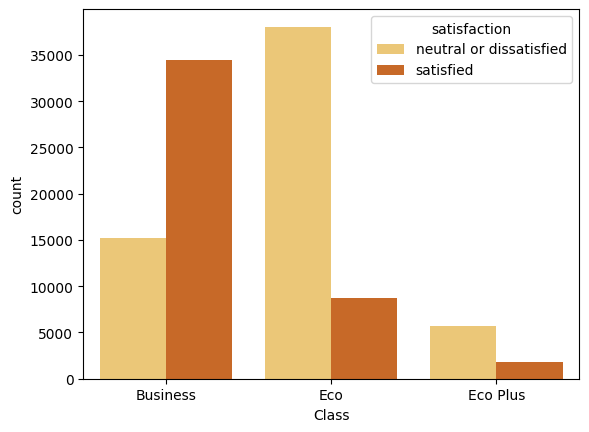

In [57]:
sns.countplot(x = 'Class', hue = 'satisfaction', palette = "YlOrBr", data = df3)
plt.show()

You can see that most of the passengers who flew in economy plus or economy class were dissatisfied with the flight, and those who fly in business class were satisfied.

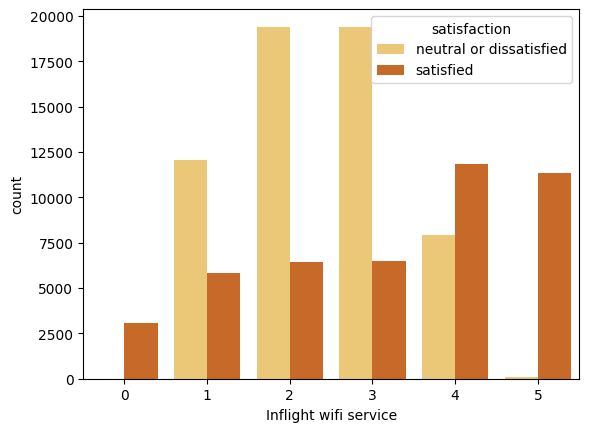

In [58]:
sns.countplot(x = 'Inflight wifi service', hue = 'satisfaction', palette = "YlOrBr", data = df3)
plt.show()

it seems if the wifi was rated 5 they were satisfied, 4 mostly satisfied, and any other was dissatisfied.

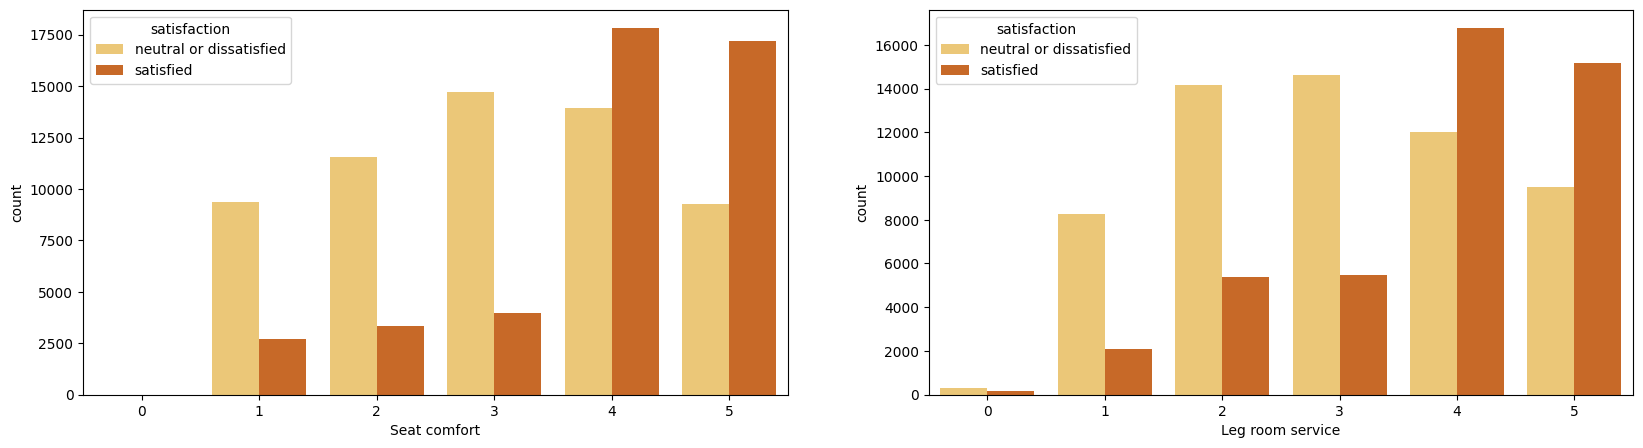

In [59]:
f, ax = plt.subplots(1, 2, figsize = (20,5))
sns.countplot(x = 'Seat comfort', hue = 'satisfaction', palette = "YlOrBr", data = df3,ax = ax[0])
sns.countplot(x = 'Leg room service', hue = 'satisfaction', palette = "YlOrBr", data = df3, ax = ax[1])
plt.show()

similar to wifi too but instead 5 may have some dissatisfied.

now we have to encode the categorical values

# POST EXPLORATION PreProcessing

turning male to 0 and female to 1

In [60]:
df3['Gender'] = df3['Gender'].map({'Male': 0, 'Female': 1})

In [61]:
df3.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,0,Loyal Customer,13,Personal Travel,Eco Plus,460.0,3,4,3,1,...,5,5,4,3,4,4,5,5,1,neutral or dissatisfied
1,0,disloyal Customer,25,Business travel,Business,235.0,3,2,3,3,...,1,1,1,5,3,1,4,1,0,neutral or dissatisfied
2,1,Loyal Customer,26,Business travel,Business,1142.0,2,2,2,2,...,5,5,4,3,4,4,4,5,0,satisfied
3,1,Loyal Customer,25,Business travel,Business,562.0,2,5,5,5,...,2,2,2,5,3,1,4,2,0,neutral or dissatisfied
4,0,Loyal Customer,61,Business travel,Business,214.0,3,3,3,3,...,5,3,3,4,4,3,3,3,0,satisfied


In [62]:
df3['Customer Type'] = df3['Customer Type'].map({'disloyal Customer': 0, 'Loyal Customer': 1})

In [63]:
df3['Type of Travel'] = df3['Type of Travel'].map({'Personal Travel': 0, 'Business travel': 1})

In [64]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103885 entries, 0 to 103884
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender                             103885 non-null  category
 1   Customer Type                      103885 non-null  category
 2   Age                                103885 non-null  int64   
 3   Type of Travel                     103885 non-null  category
 4   Class                              103885 non-null  category
 5   Flight Distance                    103885 non-null  float64 
 6   Inflight wifi service              103885 non-null  category
 7   Departure/Arrival time convenient  103885 non-null  category
 8   Ease of Online booking             103885 non-null  category
 9   Gate location                      103885 non-null  category
 10  Food and drink                     103885 non-null  category
 11  Online boarding           

In [65]:
df3.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,0,1,13,0,Eco Plus,460.0,3,4,3,1,...,5,5,4,3,4,4,5,5,1,neutral or dissatisfied
1,0,0,25,1,Business,235.0,3,2,3,3,...,1,1,1,5,3,1,4,1,0,neutral or dissatisfied
2,1,1,26,1,Business,1142.0,2,2,2,2,...,5,5,4,3,4,4,4,5,0,satisfied
3,1,1,25,1,Business,562.0,2,5,5,5,...,2,2,2,5,3,1,4,2,0,neutral or dissatisfied
4,0,1,61,1,Business,214.0,3,3,3,3,...,5,3,3,4,4,3,3,3,0,satisfied


In [66]:
df3.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
satisfaction                         0
dtype: int64

now we one-hot encode the Class feature

In [67]:
df3["Class"].isna().sum()

np.int64(0)

In [68]:
print(df3['Class'].dtype)

category


In [69]:
print(df3['Class'].unique())

['Eco Plus', 'Business', 'Eco']
Categories (3, object): ['Business', 'Eco', 'Eco Plus']


In [70]:
df4 = pd.get_dummies(df3, columns=['Class'], prefix='Class', drop_first=False)

In [71]:
df4.head()

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction,Class_Business,Class_Eco,Class_Eco Plus
0,0,1,13,0,460.0,3,4,3,1,5,...,3,4,4,5,5,1,neutral or dissatisfied,False,False,True
1,0,0,25,1,235.0,3,2,3,3,1,...,5,3,1,4,1,0,neutral or dissatisfied,True,False,False
2,1,1,26,1,1142.0,2,2,2,2,5,...,3,4,4,4,5,0,satisfied,True,False,False
3,1,1,25,1,562.0,2,5,5,5,2,...,5,3,1,4,2,0,neutral or dissatisfied,True,False,False
4,0,1,61,1,214.0,3,3,3,3,4,...,4,4,3,3,3,0,satisfied,True,False,False


In [72]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103885 entries, 0 to 103884
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender                             103885 non-null  category
 1   Customer Type                      103885 non-null  category
 2   Age                                103885 non-null  int64   
 3   Type of Travel                     103885 non-null  category
 4   Flight Distance                    103885 non-null  float64 
 5   Inflight wifi service              103885 non-null  category
 6   Departure/Arrival time convenient  103885 non-null  category
 7   Ease of Online booking             103885 non-null  category
 8   Gate location                      103885 non-null  category
 9   Food and drink                     103885 non-null  category
 10  Online boarding                    103885 non-null  category
 11  Seat comfort              

In [73]:
# 3. Optional: Convert boolean dummies to integers (if needed)
class_cols = [col for col in df4.columns if col.startswith('Class_')]
df4[class_cols] = df4[class_cols].astype(int)

In [74]:
df4.head()

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction,Class_Business,Class_Eco,Class_Eco Plus
0,0,1,13,0,460.0,3,4,3,1,5,...,3,4,4,5,5,1,neutral or dissatisfied,0,0,1
1,0,0,25,1,235.0,3,2,3,3,1,...,5,3,1,4,1,0,neutral or dissatisfied,1,0,0
2,1,1,26,1,1142.0,2,2,2,2,5,...,3,4,4,4,5,0,satisfied,1,0,0
3,1,1,25,1,562.0,2,5,5,5,2,...,5,3,1,4,2,0,neutral or dissatisfied,1,0,0
4,0,1,61,1,214.0,3,3,3,3,4,...,4,4,3,3,3,0,satisfied,1,0,0


In [75]:
df4.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
satisfaction                         0
Class_Business                       0
Class_Eco                            0
Class_Eco Plus                       0
dtype: int64

In [76]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer


df5 = df4.copy()


ordinal_cols = [
    "Inflight wifi service",
    "Departure/Arrival time convenient",
    "Ease of Online booking",
    "Gate location",
    "Food and drink",
    "Leg room service",
    "Baggage handling",
    "Checkin service",
    "Inflight service",
    "Cleanliness"
]

# Step 3: Clean and prepare ordinal columns
for col in ordinal_cols:
    # Convert to numeric, coerce errors to NaN 
    df5[col] = pd.to_numeric(df5[col], errors='coerce')
    
    # Impute missing values with median 
    imputer = SimpleImputer(strategy='median')
    df5[[col]] = imputer.fit_transform(df5[[col]])
    
    # Ensure values are integers 
    df5[col] = df5[col].round().astype(int)
    
    # Clip values to ensure they fall within 1–5
    df5[col] = df5[col].clip(lower=1, upper=5)

# Step 4: Encode ordinal columns as integers (1–5)
encoder = OrdinalEncoder(categories=[range(1, 6)] * len(ordinal_cols))
df5[ordinal_cols] = encoder.fit_transform(df5[ordinal_cols])

# Step 5: Confirm success
print("No NaNs in ordinal columns:", df5[ordinal_cols].isna().any().any())
print("\nSample data:\n", df5[ordinal_cols].head())

No NaNs in ordinal columns: False

Sample data:
    Inflight wifi service  Departure/Arrival time convenient  \
0                    2.0                                3.0   
1                    2.0                                1.0   
2                    1.0                                1.0   
3                    1.0                                4.0   
4                    2.0                                2.0   

   Ease of Online booking  Gate location  Food and drink  Leg room service  \
0                     2.0            0.0             4.0               2.0   
1                     2.0            2.0             0.0               4.0   
2                     1.0            1.0             4.0               2.0   
3                     4.0            4.0             1.0               4.0   
4                     2.0            2.0             3.0               3.0   

   Baggage handling  Checkin service  Inflight service  Cleanliness  
0               3.0              

the previous step had me sitting for an hour trying to figure out where are the nulls because we had none. ANYWAYS

In [77]:
df5.head()

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction,Class_Business,Class_Eco,Class_Eco Plus
0,0,1,13,0,460.0,2.0,3.0,2.0,0.0,4.0,...,2.0,3.0,3.0,4.0,4.0,1,neutral or dissatisfied,0,0,1
1,0,0,25,1,235.0,2.0,1.0,2.0,2.0,0.0,...,4.0,2.0,0.0,3.0,0.0,0,neutral or dissatisfied,1,0,0
2,1,1,26,1,1142.0,1.0,1.0,1.0,1.0,4.0,...,2.0,3.0,3.0,3.0,4.0,0,satisfied,1,0,0
3,1,1,25,1,562.0,1.0,4.0,4.0,4.0,1.0,...,4.0,2.0,0.0,3.0,1.0,0,neutral or dissatisfied,1,0,0
4,0,1,61,1,214.0,2.0,2.0,2.0,2.0,3.0,...,3.0,3.0,2.0,2.0,2.0,0,satisfied,1,0,0


last but not least we need to encode satisfaction.

In [78]:
df6 = df5.copy()
df6["satisfaction"] = df6["satisfaction"].map({
    "neutral or dissatisfied": 0,
    "satisfied": 1
})

# Verify success
print("Unique values in 'satisfaction':", df6["satisfaction"].unique())
print("First 5 rows of 'satisfaction':\n", df6["satisfaction"].head())

Unique values in 'satisfaction': [0 1]
First 5 rows of 'satisfaction':
 0    0
1    0
2    1
3    0
4    1
Name: satisfaction, dtype: int64


In [79]:
df6.head(20)

,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction,Class_Business,Class_Eco,Class_Eco Plus
0,0,1,13,0,460.0,2.0,3.0,2.0,0.0,4.0,...,2.0,3.0,3.0,4.0,4.0,1,0,0,0,1
1,0,0,25,1,235.0,2.0,1.0,2.0,2.0,0.0,...,4.0,2.0,0.0,3.0,0.0,0,0,1,0,0
2,1,1,26,1,1142.0,1.0,1.0,1.0,1.0,4.0,...,2.0,3.0,3.0,3.0,4.0,0,1,1,0,0
3,1,1,25,1,562.0,1.0,4.0,4.0,4.0,1.0,...,4.0,2.0,0.0,3.0,1.0,0,0,1,0,0
4,0,1,61,1,214.0,2.0,2.0,2.0,2.0,3.0,...,3.0,3.0,2.0,2.0,2.0,0,1,1,0,0
5,1,1,26,0,1180.0,2.0,3.0,1.0,0.0,0.0,...,3.0,3.0,3.0,3.0,0.0,0,0,0,1,0
6,0,1,47,0,1276.0,1.0,3.0,1.0,2.0,1.0,...,2.0,3.0,2.0,4.0,1.0,0,0,0,1,0
7,1,1,52,1,2035.0,3.0,2.0,3.0,3.0,4.0,...,4.0,4.0,3.0,4.0,3.0,0,1,1,0,0
8,1,1,41,1,853.0,0.0,1.0,1.0,1.0,3.0,...,1.0,0.0,3.0,0.0,1.0,0,0,1,0,0
9,0,0,20,1,1061.0,2.0,2.0,2.0,3.0,1.0,...,2.0,3.0,3.0,2.0,1.0,0,0,0,1,0


Now that mostly our data pre processing is done we can do some feature engineering

# Feature engineering

In [80]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103885 entries, 0 to 103884
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender                             103885 non-null  category
 1   Customer Type                      103885 non-null  category
 2   Age                                103885 non-null  int64   
 3   Type of Travel                     103885 non-null  category
 4   Flight Distance                    103885 non-null  float64 
 5   Inflight wifi service              103885 non-null  float64 
 6   Departure/Arrival time convenient  103885 non-null  float64 
 7   Ease of Online booking             103885 non-null  float64 
 8   Gate location                      103885 non-null  float64 
 9   Food and drink                     103885 non-null  float64 
 10  Online boarding                    103885 non-null  category
 11  Seat comfort              

first we will make and average service score

In [81]:
service_cols = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking',
                'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment',
                'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']
df6['Avg_Service_Quality'] = df6[service_cols].mean(axis=1)

In [82]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103885 entries, 0 to 103884
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender                             103885 non-null  category
 1   Customer Type                      103885 non-null  category
 2   Age                                103885 non-null  int64   
 3   Type of Travel                     103885 non-null  category
 4   Flight Distance                    103885 non-null  float64 
 5   Inflight wifi service              103885 non-null  float64 
 6   Departure/Arrival time convenient  103885 non-null  float64 
 7   Ease of Online booking             103885 non-null  float64 
 8   Gate location                      103885 non-null  float64 
 9   Food and drink                     103885 non-null  float64 
 10  Online boarding                    103885 non-null  category
 11  Seat comfort              

now we group services that are similar with each other, for example air services together, ground services together and etc

In [83]:
inflight_cols = ['Seat comfort', 'Inflight entertainment', 'Food and drink', 'Leg room service', 'Inflight service']
ground_cols = ['Checkin service', 'Baggage handling', 'Gate location']
booking_cols = ['Ease of Online booking', 'Online boarding']

df6['Inflight_Score'] = df6[inflight_cols].mean(axis=1)
df6['Ground_Score'] = df6[ground_cols].mean(axis=1)
df6['Booking_Score'] = df6[booking_cols].mean(axis=1)

redundant_cols = inflight_cols + ground_cols + booking_cols
df7 = df6.drop(columns=redundant_cols)

In [84]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103885 entries, 0 to 103884
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender                             103885 non-null  category
 1   Customer Type                      103885 non-null  category
 2   Age                                103885 non-null  int64   
 3   Type of Travel                     103885 non-null  category
 4   Flight Distance                    103885 non-null  float64 
 5   Inflight wifi service              103885 non-null  float64 
 6   Departure/Arrival time convenient  103885 non-null  float64 
 7   On-board service                   103885 non-null  category
 8   Cleanliness                        103885 non-null  float64 
 9   Departure Delay in Minutes         103885 non-null  int64   
 10  satisfaction                       103885 non-null  int64   
 11  Class_Business            

why didnt we remove wifi service? because it GREATLY affects the satisfaction. now we remove the gender cause it doesnt matter

In [85]:
df7 = df7.drop(columns=['Gender'])

Now i want to feature engineer the age and flight distances using the binning techniques

# MODEL SELECTION AND TRAINING

In [86]:
# Split data
X = df7.drop(columns=['satisfaction'])
y = df7['satisfaction']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [88]:
# Feature selection using mutual information
selector = SelectKBest(score_func=mutual_info_classif, k=16)  # Select top 16 features
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)
selected_features = X.columns[selector.get_support()].tolist()
print("Selected Features:", selected_features)

Selected Features: ['Customer Type', 'Age', 'Type of Travel', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'On-board service', 'Cleanliness', 'Departure Delay in Minutes', 'Class_Business', 'Class_Eco', 'Class_Eco Plus', 'Avg_Service_Quality', 'Inflight_Score', 'Ground_Score', 'Booking_Score']


In [89]:
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{model_name} Classification Report:")
    print(classification_report(y_test, y_pred, target_names=['neutral or dissatisfied', 'satisfied']))
    print()

In [90]:
# 1. Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42)
evaluate_model(rf, X_train_selected, X_test_selected, y_train, y_test, "Random Forest")

Random Forest Classification Report:
                         precision    recall  f1-score   support

neutral or dissatisfied       0.94      0.96      0.95     11795
              satisfied       0.95      0.92      0.93      8982

               accuracy                           0.94     20777
              macro avg       0.94      0.94      0.94     20777
           weighted avg       0.94      0.94      0.94     20777




In [91]:
# 2. XGBoost with tuning
xgb = XGBClassifier(random_state=42, eval_metric='logloss')
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}
grid_search = GridSearchCV(xgb, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_selected, y_train)
best_xgb = grid_search.best_estimator_
print("Best XGBoost Params:", grid_search.best_params_)
evaluate_model(best_xgb, X_train_selected, X_test_selected, y_train, y_test, "XGBoost")

Best XGBoost Params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
XGBoost Classification Report:
                         precision    recall  f1-score   support

neutral or dissatisfied       0.94      0.96      0.95     11795
              satisfied       0.95      0.91      0.93      8982

               accuracy                           0.94     20777
              macro avg       0.94      0.94      0.94     20777
           weighted avg       0.94      0.94      0.94     20777




In [92]:
# 3. Logistic Regression
lr = LogisticRegression(solver='liblinear', penalty='l1', C=1.0, random_state=42)
evaluate_model(lr, X_train_selected, X_test_selected, y_train, y_test, "Logistic Regression")

Logistic Regression Classification Report:
                         precision    recall  f1-score   support

neutral or dissatisfied       0.88      0.89      0.89     11795
              satisfied       0.86      0.84      0.85      8982

               accuracy                           0.87     20777
              macro avg       0.87      0.86      0.87     20777
           weighted avg       0.87      0.87      0.87     20777




In [93]:
# 4. SVC (using a subset for speed)
subset_size = 50000  # Use a smaller subset for SVC
X_train_subset = X_train_selected[:subset_size]
y_train_subset = y_train[:subset_size]
svc = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
evaluate_model(svc, X_train_subset, X_test_selected, y_train_subset, y_test, "SVC")

SVC Classification Report:
                         precision    recall  f1-score   support

neutral or dissatisfied       0.93      0.96      0.94     11795
              satisfied       0.94      0.90      0.92      8982

               accuracy                           0.93     20777
              macro avg       0.93      0.93      0.93     20777
           weighted avg       0.93      0.93      0.93     20777




---------------------------------------------

In [96]:
st.title("Hello from Streamlit in Jupyter! 🎈")
name = st.text_input("What's your name?")
if name:
    st.write(f"Hello, {name} 👋")

2025-05-17 22:49:30.854 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-17 22:49:30.855 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-17 22:49:30.859 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-17 22:49:30.860 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-17 22:49:30.862 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-17 22:49:30.864 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-17 22:49:30.866 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-05-17 22:49:30.867 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar